In [1]:
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, MinMaxScaler
import matplotlib.pyplot as plt



In [2]:
housing_data = fetch_california_housing(as_frame=True)
print('Input features:\n',housing_data.data.head())
print('Target feature:\n',housing_data.target.head())

Input features:
    MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  
Target feature:
 0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64


In [3]:
x=housing_data.data
y=housing_data.target

#Normalize the input features (attributes)

scalar=MinMaxScaler()

x_norm=scalar.fit_transform(x)

print('Normalized input features:\n',x_norm)


xtrain, xtest, ytrain, ytest = train_test_split(x_norm, y, test_size=0.2, random_state=42)
print('Training set size:',xtrain.shape[0])


print(xtrain.shape, xtest.shape)
print(ytrain.shape, ytest.shape)

Normalized input features:
 [[0.53966842 0.78431373 0.0435123  ... 0.00149943 0.5674814  0.21115538]
 [0.53802706 0.39215686 0.03822395 ... 0.00114074 0.565356   0.21215139]
 [0.46602805 1.         0.05275646 ... 0.00169796 0.5642933  0.21015936]
 ...
 [0.08276438 0.31372549 0.03090386 ... 0.0013144  0.73219979 0.31175299]
 [0.09429525 0.33333333 0.03178269 ... 0.0011515  0.73219979 0.30179283]
 [0.13025338 0.29411765 0.03125246 ... 0.00154886 0.72582359 0.30976096]]
Training set size: 16512
(16512, 8) (4128, 8)
(16512,) (4128,)


In [28]:
#build your first multi-layer perceptron model (MLP) using Keras
from tensorflow import keras
from keras import layers
from keras.models import Sequential

model = Sequential([
        layers.Dense(256, activation='relu', input_shape=(8,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(1) #by default, activation is linear
])

model.compile(optimizer='Adam', loss='mse', metrics=['mse', 'mae', 'accuracy'])

Streaming output truncated to the last 5000 lines.
7/7 [==============================] - 0s 39ms/step - loss: 0.1506 - mse: 0.1506 - mae: 0.2697 - accuracy: 0.0034 - val_loss: 0.2723 - val_mse: 0.2723 - val_mae: 0.3456 - val_accuracy: 0.0020
Epoch 2502/5000
7/7 [==============================] - 0s 39ms/step - loss: 0.1546 - mse: 0.1546 - mae: 0.2711 - accuracy: 0.0034 - val_loss: 0.2745 - val_mse: 0.2745 - val_mae: 0.3504 - val_accuracy: 0.0020
Epoch 2503/5000
7/7 [==============================] - 0s 40ms/step - loss: 0.1487 - mse: 0.1487 - mae: 0.2685 - accuracy: 0.0034 - val_loss: 0.2759 - val_mse: 0.2759 - val_mae: 0.3569 - val_accuracy: 0.0020
Epoch 2504/5000
7/7 [==============================] - 0s 39ms/step - loss: 0.1453 - mse: 0.1453 - mae: 0.2642 - accuracy: 0.0034 - val_loss: 0.2875 - val_mse: 0.2875 - val_mae: 0.3614 - val_accuracy: 0.0020
Epoch 2505/5000
7/7 [==============================] - 0s 39ms/step - loss: 0.1570 - mse: 0.1570 - mae: 0.2742 - accuracy: 0.0034 - v

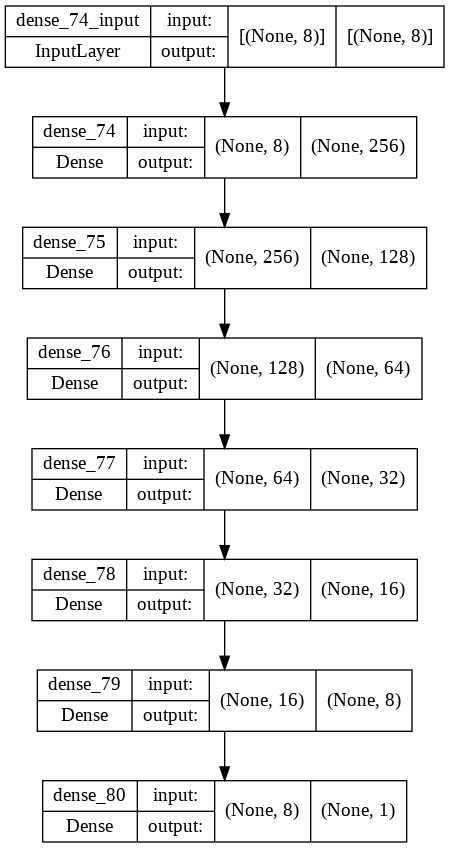

In [29]:
# train your model
import tensorflow as tf
history = model.fit(xtrain, ytrain, epochs=5000, validation_split=0.15, batch_size=2048, verbose=1)

dot_img_file = '/tmp/model_1.png'
tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)

In [18]:
loss, mae, mse, acc = model.evaluate(xtest, ytest, verbose=1)
print('loss:', loss, mse, mae)
print('accuracy:', acc)


129/129 [==============================] - 0s 2ms/step - loss: 0.3208 - mse: 0.3208 - mae: 0.4091 - accuracy: 0.0022
loss: 0.3208027482032776 0.40905430912971497 0.3208027482032776
accuracy: 0.0021802326664328575


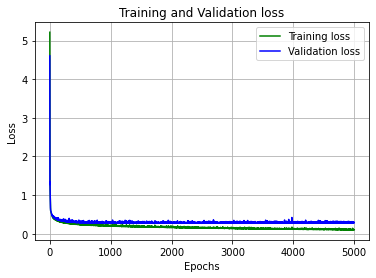

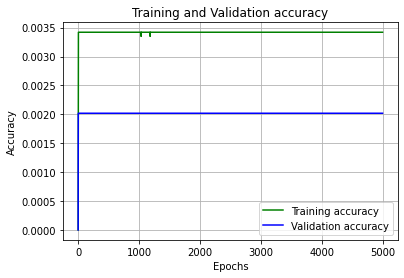

In [30]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,5001)
plt.plot(epochs, train_loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1,5001)
plt.plot(epochs, train_acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()